Take bedtools intersect output and make a nice table! 

In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sb

%matplotlib notebook

In [7]:
values = []
with open('.../output/phastcons_workflow/dm6_phastcons_intersect.txt') as f:
    for line in f:
        pattern = re.compile(r'\w*\t(\w*)\t(\w*)\t(FBgn\w*)\t(\S*)\t.*(chr\w*)\tFlyBase\sgene\t\w*\t\w*.*ID=(\w*);Name=(\w*).*\t(\S*)\t\w*')
        match = pattern.match(line)
        TF = match.group(3)
        qval = float(match.group(4))
        chrom = match.group(5)
        start = match.group(1)
        end= match.group(2)
        symbol = match.group(7)
        FBgn= match.group(6)
        phastcon = float(match.group(8))
        reorder = (TF, FBgn, symbol, chrom, start, end, qval, phastcon)
        values.append(reorder)
#print(np.vstack(values[:5]))
df = pd.DataFrame(values, columns=['TF','FBgn','Symbol', 'Chrom', 'Start', 'End', 'q Value','Phastcons'])
df.head()
#df.to_csv('/Users/bergeric/data/bedtoolsoutput_df.txt', sep='\t', index=False)



,TF,FBgn,Symbol,Chrom,Start,End,q Value,Phastcons
0,FBgn0036179,FBgn0051774,fred,chr2L,3984006,3984025,0.000363,0.495
1,FBgn0036179,FBgn0051774,fred,chr2L,3984006,3984025,0.000363,0.965
2,FBgn0036179,FBgn0051774,fred,chr2L,3984006,3984025,0.000363,0.998
3,FBgn0036179,FBgn0051774,fred,chr2L,3984006,3984025,0.000363,0.999
4,FBgn0036179,FBgn0051774,fred,chr2L,3984006,3984025,0.000363,0.994


In [8]:
grp = df.groupby(['TF', 'FBgn', 'Symbol', 'Chrom', 'Start', 'End', 'q Value'])

In [9]:
meanframe = grp.mean()
meanframe.head()

Phastcons
TF            FBgn        Symbol      Chrom Start    End      q Value           
FBgn0000028   FBgn0085422 CG34393     chr2L 3194175  3194195  0.0229    0.999850
FBgn0002521_3 FBgn0011259 Sema        chr2L 8561075  8561089  0.0338    1.000000
              FBgn0032151 nAChRalpha6 chr2L 9797252  9797266  0.0338    0.944429
              FBgn0264815 Pde1c       chr2L 11921078 11921092 0.0330    1.000000
FBgn0003499   FBgn0000114 bru1        chr2L 12195053 12195066 0.0346    0.014154

<IPython.core.display.Javascript object>


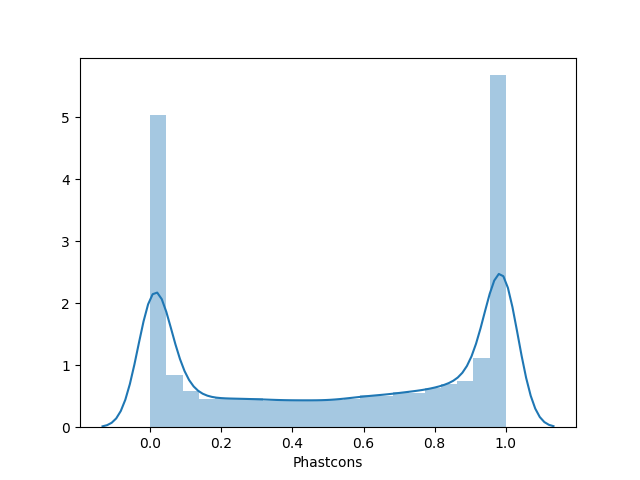

In [10]:
sb.distplot(meanframe["Phastcons"])
